In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Load dataset
df = pd.read_csv('final_dataset.csv', parse_dates=['date'])

print(df.head())

   onehot__geocode_3300100  onehot__geocode_3300159  onehot__geocode_3300209  \
0                      1.0                      0.0                      0.0   
1                      1.0                      0.0                      0.0   
2                      1.0                      0.0                      0.0   
3                      1.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   onehot__geocode_3300225  onehot__geocode_3300233  onehot__geocode_3300258  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   onehot__geocode_3300308  onehot__ge

In [3]:
# Print the list of columns
print(list(df.columns))

['onehot__geocode_3300100', 'onehot__geocode_3300159', 'onehot__geocode_3300209', 'onehot__geocode_3300225', 'onehot__geocode_3300233', 'onehot__geocode_3300258', 'onehot__geocode_3300308', 'onehot__geocode_3300407', 'onehot__geocode_3300456', 'onehot__geocode_3300506', 'onehot__geocode_3300605', 'onehot__geocode_3300704', 'onehot__geocode_3300803', 'onehot__geocode_3300902', 'onehot__geocode_3300936', 'onehot__geocode_3300951', 'onehot__geocode_3301009', 'onehot__geocode_3301108', 'onehot__geocode_3301157', 'onehot__geocode_3301207', 'onehot__geocode_3301306', 'onehot__geocode_3301405', 'onehot__geocode_3301504', 'onehot__geocode_3301603', 'onehot__geocode_3301702', 'onehot__geocode_3301801', 'onehot__geocode_3301850', 'onehot__geocode_3301876', 'onehot__geocode_3301900', 'onehot__geocode_3302007', 'onehot__geocode_3302056', 'onehot__geocode_3302106', 'onehot__geocode_3302205', 'onehot__geocode_3302254', 'onehot__geocode_3302270', 'onehot__geocode_3302304', 'onehot__geocode_3302403', 

In [4]:
df.rename(columns={'tempe_min': 'temp_min'}, inplace=True)

print(list(df.columns))

['onehot__geocode_3300100', 'onehot__geocode_3300159', 'onehot__geocode_3300209', 'onehot__geocode_3300225', 'onehot__geocode_3300233', 'onehot__geocode_3300258', 'onehot__geocode_3300308', 'onehot__geocode_3300407', 'onehot__geocode_3300456', 'onehot__geocode_3300506', 'onehot__geocode_3300605', 'onehot__geocode_3300704', 'onehot__geocode_3300803', 'onehot__geocode_3300902', 'onehot__geocode_3300936', 'onehot__geocode_3300951', 'onehot__geocode_3301009', 'onehot__geocode_3301108', 'onehot__geocode_3301157', 'onehot__geocode_3301207', 'onehot__geocode_3301306', 'onehot__geocode_3301405', 'onehot__geocode_3301504', 'onehot__geocode_3301603', 'onehot__geocode_3301702', 'onehot__geocode_3301801', 'onehot__geocode_3301850', 'onehot__geocode_3301876', 'onehot__geocode_3301900', 'onehot__geocode_3302007', 'onehot__geocode_3302056', 'onehot__geocode_3302106', 'onehot__geocode_3302205', 'onehot__geocode_3302254', 'onehot__geocode_3302270', 'onehot__geocode_3302304', 'onehot__geocode_3302403', 

In [5]:
# Split dataset based on the year column
train_df = df[df['year'] <= 2020]
test_df = df[df['year'] >= 2021]

In [6]:
print("Training set shape:", train_df.shape)

Training set shape: (42770, 114)


In [7]:
print("Test set shape:", test_df.shape)

Test set shape: (9464, 114)


In [8]:
# Define columns to drop
columns_to_drop = [
    'cases',       # Target variable
    'date',        # Redundant
    'week',        # Represented by week_sin and week_cos
    'month',       # Represented by week_sin and week_cos
    'temp_min',
    'temp_max',
    'humidity_min',
    'humidity_max', 
    'vim_monthly',
    'precipitation_avg_ordinary_krigging',
    'precipitation_max_ordinary_krigging'
]

In [9]:
# Separate features and target variable
X_train = train_df.drop(columns=columns_to_drop)
y_train = train_df[['cases']]

X_test = test_df.drop(columns=columns_to_drop)
y_test = test_df[['cases']]

In [10]:
print(list(X_train.columns))

['onehot__geocode_3300100', 'onehot__geocode_3300159', 'onehot__geocode_3300209', 'onehot__geocode_3300225', 'onehot__geocode_3300233', 'onehot__geocode_3300258', 'onehot__geocode_3300308', 'onehot__geocode_3300407', 'onehot__geocode_3300456', 'onehot__geocode_3300506', 'onehot__geocode_3300605', 'onehot__geocode_3300704', 'onehot__geocode_3300803', 'onehot__geocode_3300902', 'onehot__geocode_3300936', 'onehot__geocode_3300951', 'onehot__geocode_3301009', 'onehot__geocode_3301108', 'onehot__geocode_3301157', 'onehot__geocode_3301207', 'onehot__geocode_3301306', 'onehot__geocode_3301405', 'onehot__geocode_3301504', 'onehot__geocode_3301603', 'onehot__geocode_3301702', 'onehot__geocode_3301801', 'onehot__geocode_3301850', 'onehot__geocode_3301876', 'onehot__geocode_3301900', 'onehot__geocode_3302007', 'onehot__geocode_3302056', 'onehot__geocode_3302106', 'onehot__geocode_3302205', 'onehot__geocode_3302254', 'onehot__geocode_3302270', 'onehot__geocode_3302304', 'onehot__geocode_3302403', 

In [11]:
print(list(y_train.columns))

['cases']


In [12]:
print(list(X_test.columns))

['onehot__geocode_3300100', 'onehot__geocode_3300159', 'onehot__geocode_3300209', 'onehot__geocode_3300225', 'onehot__geocode_3300233', 'onehot__geocode_3300258', 'onehot__geocode_3300308', 'onehot__geocode_3300407', 'onehot__geocode_3300456', 'onehot__geocode_3300506', 'onehot__geocode_3300605', 'onehot__geocode_3300704', 'onehot__geocode_3300803', 'onehot__geocode_3300902', 'onehot__geocode_3300936', 'onehot__geocode_3300951', 'onehot__geocode_3301009', 'onehot__geocode_3301108', 'onehot__geocode_3301157', 'onehot__geocode_3301207', 'onehot__geocode_3301306', 'onehot__geocode_3301405', 'onehot__geocode_3301504', 'onehot__geocode_3301603', 'onehot__geocode_3301702', 'onehot__geocode_3301801', 'onehot__geocode_3301850', 'onehot__geocode_3301876', 'onehot__geocode_3301900', 'onehot__geocode_3302007', 'onehot__geocode_3302056', 'onehot__geocode_3302106', 'onehot__geocode_3302205', 'onehot__geocode_3302254', 'onehot__geocode_3302270', 'onehot__geocode_3302304', 'onehot__geocode_3302403', 

In [13]:
print(list(y_test.columns))

['cases']


In [14]:
# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_depth': [10, 12, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 3, 5],
#     'max_features': ['sqrt', 'log2', None],  # None will use all features
#     'bootstrap': [True, False]
# }

# # Initialize the Random Forest Regressor
# model = RandomForestRegressor(random_state=42, n_jobs=-1)

# # Perform Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter=10,  # Number of random combinations to try
#     cv=5,       # Cross-validation
#     scoring='neg_mean_squared_error',  # Using MSE to score models
#     random_state=42,
#     n_jobs=-1,  # Use all CPU cores
#     verbose=2   # To show progress
# )

# # Fit the model
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

In [15]:
# # Use the best estimator found from the random search
# best_model = random_search.best_estimator_

# # Predict on the test set
# y_pred = best_model.predict(X_test)

# # Calculate MSE and R-squared
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [16]:
rf_model = RandomForestRegressor(
    n_estimators=100,              # Increase trees for better averaging and stability
    max_depth=20,                  # Allow deeper trees to capture complex patterns
    min_samples_split=5,           # Reduce the minimum samples to allow more splits
    min_samples_leaf=1,            # Reduce the minimum samples per leaf for finer splits
    max_features='sqrt',           # Use the square root of features to prevent overfitting
    bootstrap=False,                # Bootstrapping enabled (default)
    random_state=37,               # Ensure reproducibility
    n_jobs=-1                      # Leverage all CPU cores
)

In [17]:
# Train the model with progress visualization
print("Training Random Forest model...")
for _ in tqdm(range(1), desc="Training Progress"):
    rf_model.fit(X_train, y_train.values.ravel())

print("Model training complete.")

Training Random Forest model...


Training Progress: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]

Model training complete.


In [18]:
# # Define RandomForestRegressor and parameter grid
# model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [19]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

In [20]:
# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            scoring='neg_mean_squared_error',
#                            cv=3, verbose=2, n_jobs=-1)

In [21]:
# # Train the model with grid search
# print("Starting Grid Search...")
# grid_search.fit(X_train, y_train.values.ravel())
# print("Grid Search Complete!")

In [22]:
# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best MSE from Grid Search:", -grid_search.best_score_)

In [23]:
# # Train final model with best parameters
# rf_model = grid_search.best_estimator_

In [24]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [25]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 742.5186066876762
R-squared (R2): -2.092040763324429


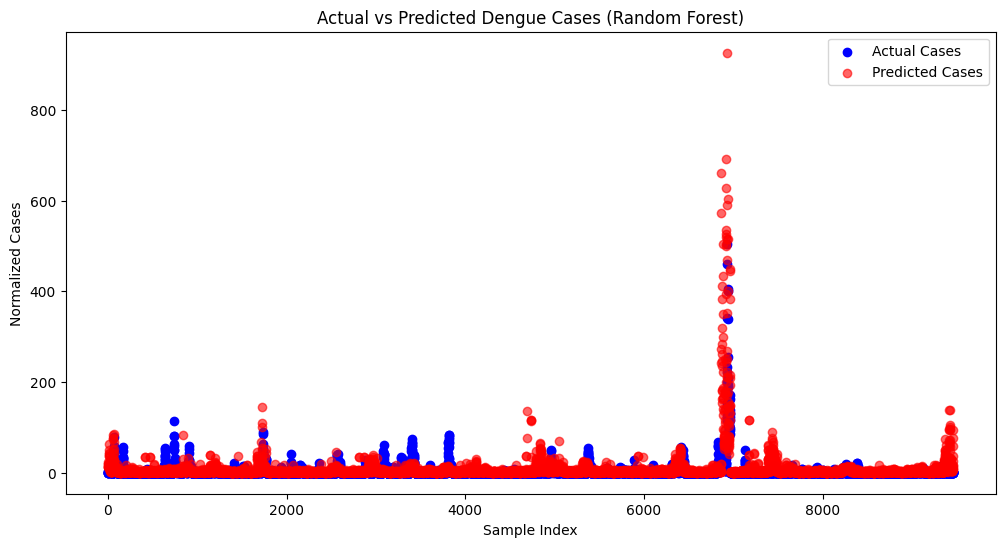

In [26]:
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Cases')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Cases', alpha=0.6)
plt.title('Actual vs Predicted Dengue Cases (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Cases')
plt.legend()
plt.show()

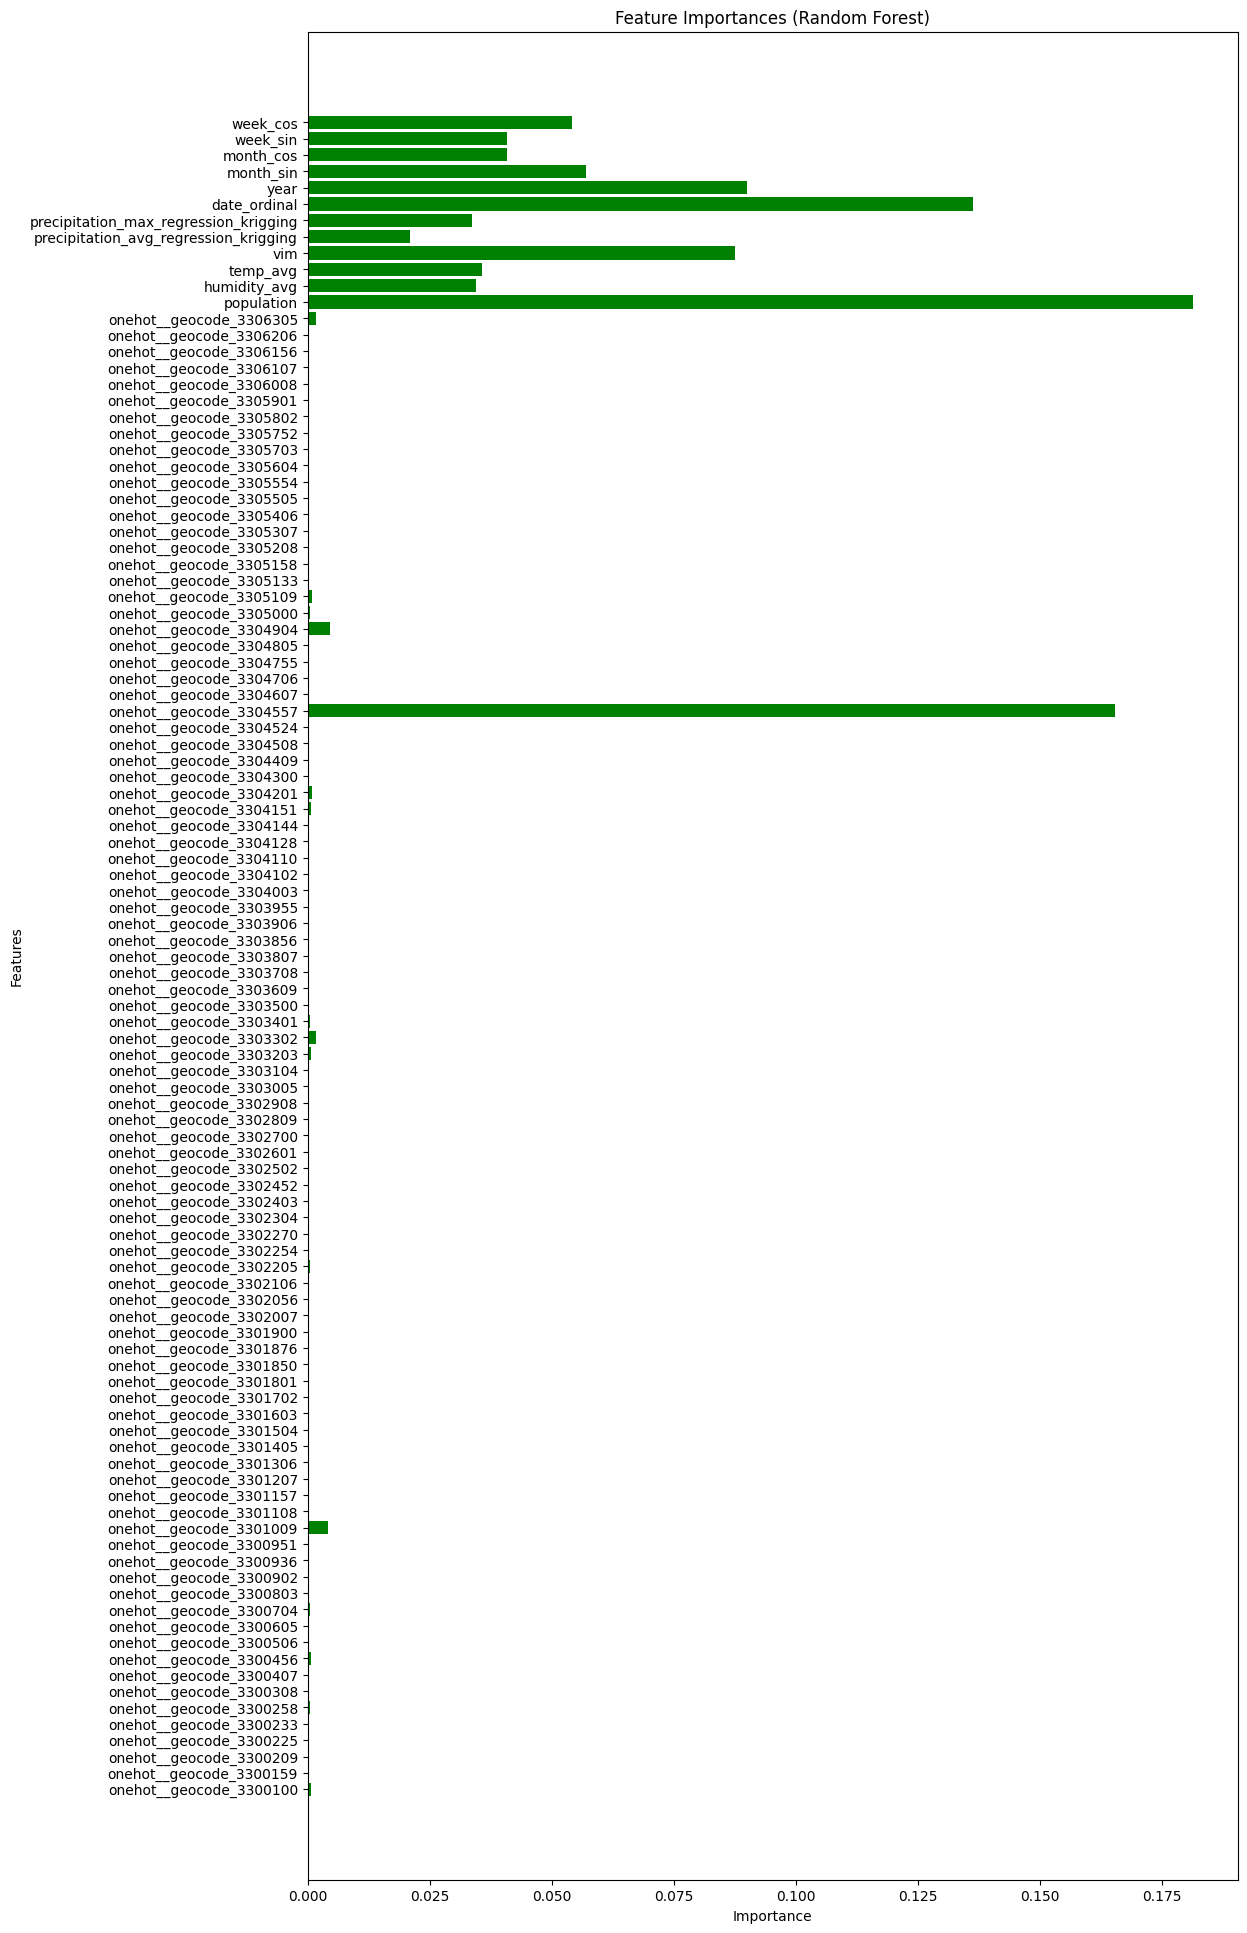

In [27]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(12, 24))
plt.barh(features, feature_importances, color='green')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [28]:
for feature, importance in zip(features, feature_importances):
    print(feature, f"{importance:.20f}")

onehot__geocode_3300100 0.00063585842385933662
onehot__geocode_3300159 0.00001170958710369873
onehot__geocode_3300209 0.00003234816573227449
onehot__geocode_3300225 0.00000959598277144784
onehot__geocode_3300233 0.00004278020591454542
onehot__geocode_3300258 0.00052588088986653566
onehot__geocode_3300308 0.00001942315510682338
onehot__geocode_3300407 0.00001323202139796581
onehot__geocode_3300456 0.00066204207378544320
onehot__geocode_3300506 0.00000220333650867897
onehot__geocode_3300605 0.00005229292311979773
onehot__geocode_3300704 0.00052734239802090582
onehot__geocode_3300803 0.00003410997881513782
onehot__geocode_3300902 0.00000310549687278793
onehot__geocode_3300936 0.00002151487223101525
onehot__geocode_3300951 0.00001163474138103096
onehot__geocode_3301009 0.00407155149124636007
onehot__geocode_3301108 0.00002142639951361279
onehot__geocode_3301157 0.00001585765062692348
onehot__geocode_3301207 0.00000240733727456943
onehot__geocode_3301306 0.00000227846561175498
onehot__geoco

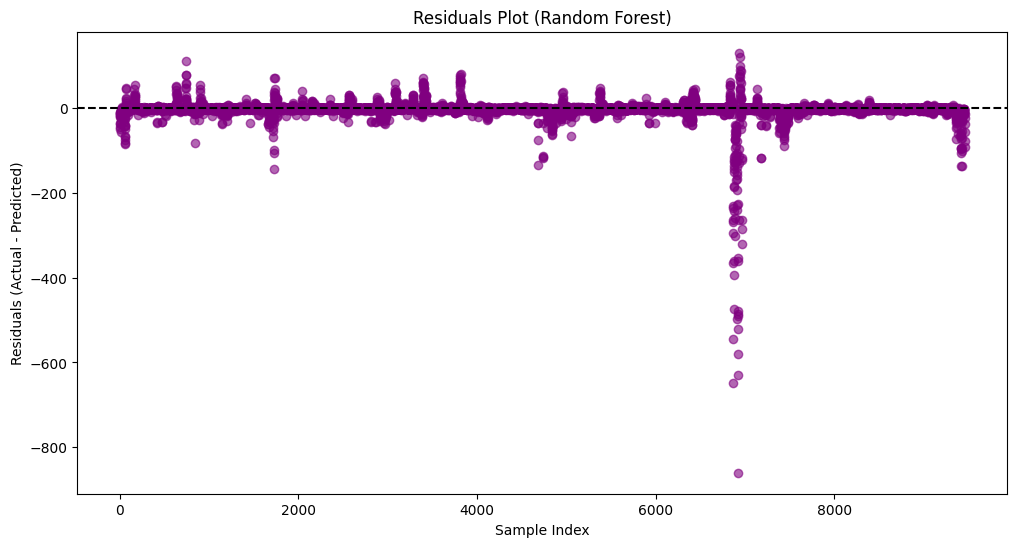

In [29]:
# Residual plot
residuals = y_test.values.ravel() - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()